LENDING - RF Version - Interpretability (c) Daniele Marazzina

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score

In [2]:
df = pd.read_excel('lendingclub_fulldata.xlsx')
# 1 = good, 0 = default

# splitting in training and test...
train_predictors, test_predictors, train_response, test_response = train_test_split(
       df.drop('loan_status', axis=1), df['loan_status'], train_size=0.7, random_state=0)

In [3]:
  # model definition + training
n_estimators = 70
max_depth = 70
min_samples_split = 28
min_samples_leaf = 28
min_impurity_decrease = 0
parameters = {"n_estimators": n_estimators,
      "max_depth": max_depth,
      "min_samples_split": min_samples_split,
      "min_samples_leaf": min_samples_leaf,
      "min_impurity_decrease": min_impurity_decrease,
      "random_state": 0,
       }
classifier = RandomForestClassifier(**parameters)
classifier.fit(train_predictors, train_response)

RandomForestClassifier(max_depth=70, min_impurity_decrease=0,
                       min_samples_leaf=28, min_samples_split=28,
                       n_estimators=70, random_state=0)

[0.03335663 0.32587298 0.39636316 0.24440723]


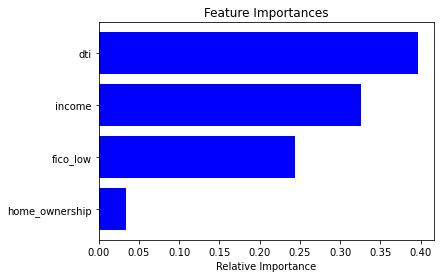

In [4]:
# Feature Selection
print(classifier.feature_importances_)
importances = classifier.feature_importances_
indices = np.argsort(importances)
features = train_predictors.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [5]:
import shap
rf_explainer = shap.TreeExplainer(classifier)
shap_values = rf_explainer.shap_values(train_predictors)

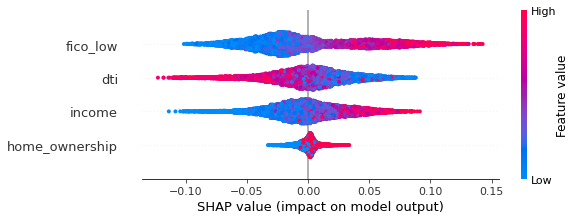

In [6]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], train_predictors)
# When plotting, we call shap_values[1]. For classification problems, 
#    there is a separate array of SHAP values for each possible outcome. 


In [7]:
shap_values[0]

array([[ 0.00015619,  0.0108397 ,  0.0131336 , -0.05723753],
       [ 0.00041079, -0.02883792,  0.00535285, -0.00665956],
       [-0.00151317, -0.01943562, -0.01841234, -0.03544995],
       ...,
       [-0.00239232,  0.00306282, -0.00268367, -0.05682417],
       [-0.00256734,  0.0051699 , -0.00571578,  0.02838896],
       [-0.01268947,  0.00022372, -0.05236223,  0.02030689]])

In [8]:
shap_values[1]

array([[-0.00015619, -0.0108397 , -0.0131336 ,  0.05723753],
       [-0.00041079,  0.02883792, -0.00535285,  0.00665956],
       [ 0.00151317,  0.01943562,  0.01841234,  0.03544995],
       ...,
       [ 0.00239232, -0.00306282,  0.00268367,  0.05682417],
       [ 0.00256734, -0.0051699 ,  0.00571578, -0.02838896],
       [ 0.01268947, -0.00022372,  0.05236223, -0.02030689]])

In [9]:
y = classifier.predict_proba(train_predictors)

In [10]:
y[0,0] #prediction (default probability)

0.14154587911189992

In [11]:
import statistics
statistics.mean(y[:,0]) #average prediction

0.17496644616770765

In [12]:
A=shap_values[0] # shap value for class 0
A[0,0]+A[0,1]+A[0,2]+A[0,3] #contribution of all shap values for observation 0

-0.03310804816743143

In [13]:
y[0,0]-statistics.mean(y[:,0]) #delta between prediction for observation 0 and average prediction

-0.03342056705580773

In [13]:
train_predictors

,home_ownership,income,dti,fico_low
4635,1,83.000,25.56,745
1278,1,75.000,20.52,685
6403,1,93.200,10.69,745
12378,1,58.000,20.07,660
7166,0,75.000,4.91,700
...,...,...,...,...
13123,0,25.188,16.34,690
3264,1,650.000,3.47,765
9845,0,37.184,20.17,710
10799,0,55.000,26.53,680


In [14]:
A[10,0]+A[10,1]+A[10,2]+A[10,3] #observation 10

0.01197226344124919

In [15]:
y[10,0]-statistics.mean(y[:,0])

0.01165974455287197

In [16]:
A[100,0]+A[100,1]+A[100,2]+A[100,3] #observation 100

0.08146739913856703

In [17]:
y[100,0]-statistics.mean(y[:,0])

0.08115488025019005